# \#GRIPAPR2022
## **TASK 1: Prediction Using Supervised ML**
### *Problem: Predict the Percentage of Marks a student obtains on the basis of the No. of hours studied.*

### Importing Packages

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Loading DataSet

In [ ]:
stud = pd.read_csv('http://bit.ly/w-data')


In [ ]:
stud.shape #calculating shape of the dataset

(25, 2)

In [ ]:
stud.head(10) #showing first 10 entries of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
stud.columns #showing various features present in the dataset

Index(['Hours', 'Scores'], dtype='object')

### Checking for Missing Values

In [ ]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
stud.isnull().sum() #concludes that no missing values are there in the dataset

Hours     0
Scores    0
dtype: int64

### Displaying the Dataset

In [ ]:
x = stud[['Hours']]
y = stud[['Scores']]

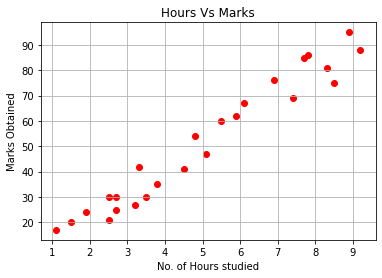

In [ ]:
plt.scatter(x,y,color = 'red')
plt.xlabel('No. of Hours studied')
plt.ylabel('Marks Obtained')
plt.title('Hours Vs Marks')
plt.grid()
plt.show()

##### From the above Scatter Plot we can conclude that 'Hours studied' & 'Marks Obtained' are linearly related. Hence we'll use LinearRegression to build our model

### Splitting DataSet

In [ ]:
x = stud.drop('Scores',axis = 1)
y = stud[['Scores']]

In [ ]:
x.shape,y.shape

((25, 1), (25, 1))

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

#using train_test_split to create Training and Testing Data

In [ ]:
print('Shape of Training DataSet:',X_train.shape)
print('Shape of Testing DataSet:',X_test.shape)

Shape of Training DataSet: (17, 1)
Shape of Testing DataSet: (8, 1)


### Training DataSet

In [ ]:
reg_model = LinearRegression()  #using LinearRegression for our model

In [ ]:
reg_model.fit(X_train,Y_train)
print('Training Completed')

Training Completed


### Checking Accuracy of Model on Training Data

In [ ]:
y_train_pred = reg_model.predict(X_train) #storing the predicted value of training dataset

In [ ]:
print('Model Accuracy on Training Dataset:',reg_model.score(X_train,Y_train)) #printing the accuracy of model on training data

Model Accuracy on Training Dataset: 0.9484997422695115


#### Displaying Model Accuracy on Training Data

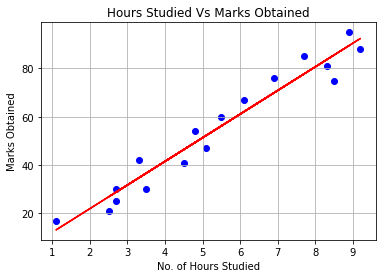

In [ ]:
plt.scatter(X_train,Y_train,color = 'blue')
plt.plot(X_train,y_train_pred,color = 'red')
plt.grid()
plt.xlabel('No. of Hours Studied')
plt.ylabel('Marks Obtained')
plt.title('Hours Studied Vs Marks Obtained')
plt.show()

### Checking Model Accuracy Graphically on Testing Data

In [ ]:
y_pred_test = reg_model.predict(X_test) #storing predicted value of testing data

In [ ]:
print('Model Accuracy on Testing DataSet:',reg_model.score(X_test,Y_test)) #printing the accuracy of model on test data

Model Accuracy on Testing DataSet: 0.9568211104435257


### Displaying Model Accuracy Graphically of Testing Data

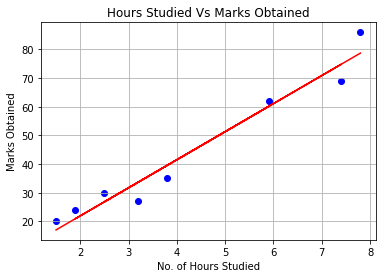

In [ ]:
plt.scatter(X_test,Y_test,color='blue')
plt.plot(X_test,y_pred_test,color='red')
plt.grid()
plt.title('Hours Studied Vs Marks Obtained')
plt.xlabel('No. of Hours Studied')
plt.ylabel('Marks Obtained')
plt.show()

### Making Prediction 

In [ ]:
hours = 9.25 
#here we are checking the percentage of a random student on the basis of the no of hours studied
hours = np.array(hours)
hours = hours.reshape(1,-1)
pred = reg_model.predict(hours)
print('No.of Hours Studied: {} '.format(hours[0][0]))
print('Marks Predicted: {}'.format(pred[0][0]))


No.of Hours Studied: 9.25 
Marks Predicted: 92.91505723477056


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### Evaluating the Performance of our Model 

#### Performance of our model is being calculated on the basis of mean absolute error made. Lesser the error value better is the performance of the model

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,y_pred_test))

Mean Absolute Error: 4.419727808027651


##**Conclusion: Our model predicted that the student who studies about 9.25 hrs/day has a very good chance of getting 92.91% of marks in the examination**